In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

### Airports

In [2]:
airports = pd.read_csv("airports.csv")
airports.shape

(3376, 7)

In [49]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [48]:
airports.dropna()[airports.lat < 23.5][['lat', 'airport', 'state']].sort_values(by='lat', ascending=False)

/var/folders/_m/fd0pgt2d59q_98kq7r467pv80000gn/T/ipykernel_39185/3833147014.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airports.dropna()[airports.lat < 23.5][['lat', 'airport', 'state']].sort_values(by='lat', ascending=False)


,lat,airport,state
1718,22.209190,Princeville,HI
2073,21.975983,Lihue,HI
2581,21.896868,Port Allen,HI
1701,21.579474,Dillingham Airfield,HI
1737,21.318691,Honolulu International,HI
1931,21.307354,Kalaeloa (John Rodgers ),HI
2113,21.211040,Kalaupapa,HI
2265,21.152886,Molokai,HI
1917,20.962936,Kapalua,HI
2482,20.898650,Kahului,HI


In [4]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [5]:
airports[airports['state'].isna()]

,iata,airport,city,state,country,lat,long
1136,CLD,MC Clellan-Palomar Airport,NaN,NaN,USA,33.127231,-117.278727
1715,HHH,Hilton Head,NaN,NaN,USA,32.224384,-80.697629
2251,MIB,Minot AFB,NaN,NaN,USA,48.415769,-101.358039
2312,MQT,Marquette County Airport,NaN,NaN,USA,46.353639,-87.395361
2752,RCA,Ellsworth AFB,NaN,NaN,USA,44.145094,-103.103567
2759,RDR,Grand Forks AFB,NaN,NaN,USA,47.961167,-97.401167
2794,ROP,Prachinburi,NaN,NaN,Thailand,14.078333,101.378334
2795,ROR,Babelthoup/Koror,NaN,NaN,Palau,7.367222,134.544167
2900,SCE,University Park,NaN,NaN,USA,40.851206,-77.846302
2964,SKA,Fairchild AFB,NaN,NaN,USA,47.615058,-117.655803


### Carriers

In [2]:
carriers = pd.read_csv("carriers.csv")
carriers.shape

(1491, 2)

In [71]:
carriers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [8]:
carriers.iloc[1000:1010]

,Code,Description
1000,PLA,Planes Inc.
1001,PLQ,Planet Airways
1002,PLZ,Polar Airways Inc.
1003,PMA,Pacific Missionary Aviation
1004,PMT,Pilgrim Aviation & Airlines
1005,PN,Pan American Airways Corp.
1006,PNM,Panama Aviation
1007,PNQ,Panagra Airways
1008,PNR,Pioneer Airways
1009,PNS,Pine State Airlines


In [2]:
descriptions = pd.read_csv("variable-descriptions.csv")
descriptions.shape

(31, 3)

In [3]:
descriptions.head()

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan


In [4]:
descriptions.columns = [descriptions.columns[0], descriptions.iloc[1][1], descriptions.iloc[1][2]]
descriptions.dropna(inplace=True)
descriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 2 to 30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variable descriptions  29 non-null     float64
 1   Name                   29 non-null     object 
 2   Description            29 non-null     object 
dtypes: float64(1), object(2)
memory usage: 928.0+ bytes


In [13]:
descriptions['Variable descriptions'] = descriptions['Variable descriptions'].astype(int)

In [7]:
descriptions['Name'].values

array(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'], dtype=object)

In [14]:
descriptions

,Variable descriptions,Name,Description
2,1,Year,1987-2008
3,2,Month,12-Jan
4,3,DayofMonth,31-Jan
5,4,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5,DepTime,"actual departure time (local, hhmm)"
7,6,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7,ArrTime,"actual arrival time (local, hhmm)"
9,8,CRSArrTime,"scheduled arrival time (local, hhmm)"
10,9,UniqueCarrier,unique carrier code
11,10,FlightNum,flight number


In [15]:
planes = pd.read_csv("plane-data.csv")
planes.shape

(5029, 9)

In [16]:
planes.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [18]:
planes.dropna()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [2]:
data = pd.read_csv("1987.csv")
data.shape

(1311826, 29)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  TailNum            0 non-null        float64
 11  ActualElapsedTime  1288326 non-null  float64
 12  CRSElapsedTime     1311826 non-null  int64  
 13  AirTime            0 non-null        float64
 14  ArrDelay           1288326 non-null  float64
 15  DepDelay           1292141 non-n

In [8]:
df_numeric = data[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
          'FlightNum', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'ArrDelay', 'DepDelay']]

In [9]:
df_numeric.dropna(inplace=True)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287333 entries, 0 to 1311825
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1287333 non-null  int64  
 1   Month              1287333 non-null  int64  
 2   DayofMonth         1287333 non-null  int64  
 3   DayOfWeek          1287333 non-null  int64  
 4   CRSDepTime         1287333 non-null  int64  
 5   CRSArrTime         1287333 non-null  int64  
 6   FlightNum          1287333 non-null  int64  
 7   CRSElapsedTime     1287333 non-null  int64  
 8   ActualElapsedTime  1287333 non-null  float64
 9   Distance           1287333 non-null  float64
 10  ArrDelay           1287333 non-null  float64
 11  DepDelay           1287333 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 127.7 MB


/var/folders/_m/fd0pgt2d59q_98kq7r467pv80000gn/T/ipykernel_61307/1558586959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


In [11]:
y = df_numeric['ArrDelay']
X = df_numeric.drop(['ArrDelay', 'DepDelay'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [29]:
from sklearn.linear_model import Ridge, LinearRegression

ridge_regr = Ridge()
ridge_regr.fit(X_train, y_train)

Ridge()

In [30]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ridge_regr.predict(X_test), y_test)

501.7794730933227

In [28]:
mean_squared_error(ridge_regr.predict(X_train), y_train)

503.0617097562245

In [31]:
mean_squared_error(lin_regr.predict(X_test), y_test)

501.7794733040922

In [32]:
lin_regr.predict(X_test)

array([ 9.54991207, -1.66639223,  5.44367958, ...,  8.40567714,
       18.5954072 ,  3.15599337])

In [33]:
y_test

349494      2.0
773874    -11.0
309173      3.0
993409     12.0
199888      7.0
           ... 
1085755    -7.0
1218835    -4.0
580543     30.0
1287923    17.0
847192     -5.0
Name: ArrDelay, Length: 257467, dtype: float64

In [5]:
data.corr()[['ArrDelay', 'DepDelay']]

/var/folders/_m/fd0pgt2d59q_98kq7r467pv80000gn/T/ipykernel_61307/544297111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[['ArrDelay', 'DepDelay']]


,ArrDelay,DepDelay
Year,NaN,NaN
Month,0.126794,0.120225
DayofMonth,0.069229,0.076482
DayOfWeek,-0.038914,-0.018291
DepTime,0.116684,0.132768
CRSDepTime,0.088362,0.100831
ArrTime,0.064226,0.068323
CRSArrTime,0.086463,0.100121
FlightNum,0.039494,0.029196
TailNum,NaN,NaN


In [44]:
df = data[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest']]
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,CRSArrTime,ArrTime,ArrDelay,DepDelay,Origin,Dest
0,1987,10,14,3,730,741.0,849,912.0,23.0,11.0,SAN,SFO
1,1987,10,15,4,730,729.0,849,903.0,14.0,-1.0,SAN,SFO
2,1987,10,17,6,730,741.0,849,918.0,29.0,11.0,SAN,SFO
3,1987,10,18,7,730,729.0,849,847.0,-2.0,-1.0,SAN,SFO
4,1987,10,19,1,730,749.0,849,922.0,33.0,19.0,SAN,SFO


In [45]:
df[(df.Month == 11) & (df.DayofMonth == 21)].sort_values(by='DepDelay', ascending=False).head(20)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,CRSArrTime,ArrTime,ArrDelay,DepDelay,Origin,Dest
740562,1987,11,21,6,1701,1700.0,1805,1805.0,0.0,1439.0,SLC,BZN
664055,1987,11,21,6,1105,1625.0,1233,1758.0,325.0,320.0,DTW,EWR
663709,1987,11,21,6,1745,2258.0,2126,234.0,308.0,313.0,MSY,EWR
659817,1987,11,21,6,1515,1951.0,1741,2203.0,262.0,276.0,IAD,FLL
488826,1987,11,21,6,1540,2009.0,2220,242.0,262.0,269.0,OGG,LAX
555916,1987,11,21,6,1645,2104.0,1830,NaN,NaN,259.0,FLL,ATL
763696,1987,11,21,6,1605,2004.0,1829,2205.0,216.0,239.0,LGA,ATL
661437,1987,11,21,6,1505,1900.0,1802,2151.0,229.0,235.0,EWR,RSW
661486,1987,11,21,6,1840,2220.0,2120,100.0,220.0,220.0,RSW,EWR
559863,1987,11,21,6,1429,1751.0,1535,1858.0,203.0,202.0,PHL,BOS


In [43]:
df[(df.Month == 11) & (df.DayofMonth == 22)].sort_values(by='DepDelay', ascending=False).head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest
657054,1987,11,22,7,1022.0,1125.0,0.0,1414.0,CLT,FAY
710741,1987,11,22,7,1003.0,1210.0,0.0,1320.0,ATL,JAN
617623,1987,11,22,7,2108.0,2334.0,345.0,353.0,LAX,SEA
745202,1987,11,22,7,2149.0,18.0,230.0,244.0,MIA,LGA
750204,1987,11,22,7,1755.0,NaN,NaN,235.0,TPA,DCA
674331,1987,11,22,7,2140.0,NaN,NaN,235.0,DEN,BIL
856938,1987,11,22,7,1349.0,2125.0,270.0,229.0,HNL,SFO
856949,1987,11,22,7,2018.0,NaN,NaN,228.0,EWR,HNL
514701,1987,11,22,7,1636.0,1817.0,221.0,226.0,RSW,ORD
673019,1987,11,22,7,2251.0,212.0,184.0,206.0,IAH,CLE


In [33]:
df[df["DepDelay"] > 180].groupby(['Month', 'DayofMonth', 'Origin'])['DepDelay'].count().sort_values(ascending=False).head(15)

Month  DayofMonth  Origin
12     23          DEN       226
       26          DEN        88
       28          DEN        86
       13          DEN        78
       24          DEN        49
       28          DTW        41
11     12          BOS        32
12     11          LAX        29
       23          SLC        26
       29          DEN        23
11     15          DFW        23
10     28          SEA        21
11     26          DEN        20
12     23          LAX        18
       28          IAH        18
Name: DepDelay, dtype: int64

In [34]:
df[df["DepDelay"] > 180].groupby(['Month', 'DayofMonth', 'Dest'])['DepDelay'].count().sort_values(ascending=False).head(15)

Month  DayofMonth  Dest
12     23          DEN     163
       28          DEN      51
       24          DEN      40
       13          DEN      36
       26          DEN      33
       29          DEN      24
       23          LAX      23
       14          DEN      22
       23          SFO      21
       11          LAX      19
       23          SLC      17
       28          IAH      17
11     15          DEN      15
12     30          DEN      15
11     16          IAH      15
Name: DepDelay, dtype: int64

In [9]:
df.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,ArrDelay,DepDelay,FlightNum
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.003943,-0.039154,0.006865,-0.000500,0.126794,0.120225,-0.000245
DayofMonth,NaN,-0.003943,1.000000,-0.001904,0.000008,-0.003006,0.069229,0.076482,0.000252
DayOfWeek,NaN,-0.039154,-0.001904,1.000000,0.003751,0.004139,-0.038914,-0.018291,0.000678
DepTime,NaN,0.006865,0.000008,0.003751,1.000000,0.776380,0.116684,0.132768,0.017926
ArrTime,NaN,-0.000500,-0.003006,0.004139,0.776380,1.000000,0.064226,0.068323,0.003181
ArrDelay,NaN,0.126794,0.069229,-0.038914,0.116684,0.064226,1.000000,0.796817,0.039494
DepDelay,NaN,0.120225,0.076482,-0.018291,0.132768,0.068323,0.796817,1.000000,0.029196
FlightNum,NaN,-0.000245,0.000252,0.000678,0.017926,0.003181,0.039494,0.029196,1.000000


In [35]:
df[(df.Month==12) & (df.DayofMonth==31) & (df.DepTime>=2300)][['DepTime', 'DepDelay', 'FlightNum']].sort_values(by='DepDelay', ascending=False)

,DepTime,DepDelay,FlightNum
1098475,2314.0,154.0,851
1193969,2330.0,120.0,409
919620,2358.0,118.0,245
1096999,2355.0,110.0,800
914095,2348.0,108.0,114
...,...,...,...
1101706,2330.0,-5.0,974
871887,2309.0,-6.0,933
1042215,2340.0,-10.0,1074
989549,2306.0,-19.0,896


In [59]:
data_1987.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1311826.0,1.311826e+06,1.311826e+06,1.311826e+06,1.292141e+06,1.311826e+06,1.288326e+06,1.311826e+06,1.311826e+06,0.0,...,0.0,0.0,1.311826e+06,0.0,1.311826e+06,0.0,0.0,0.0,0.0,0.0
mean,1987.0,1.099374e+01,1.571761e+01,3.949043e+00,1.369276e+03,1.361131e+03,1.493152e+03,1.491052e+03,6.701427e+02,NaN,...,NaN,NaN,1.500580e-02,NaN,2.908160e-03,NaN,NaN,NaN,NaN,NaN
std,0.0,8.232012e-01,8.835640e+00,1.986290e+00,4.787183e+02,4.719701e+02,4.987503e+02,4.868002e+02,5.145510e+02,NaN,...,NaN,NaN,1.215756e-01,NaN,5.384891e-02,NaN,NaN,NaN,NaN,NaN
min,1987.0,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1987.0,1.000000e+01,8.000000e+00,2.000000e+00,9.460000e+02,9.400000e+02,1.117000e+03,1.115000e+03,2.910000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1987.0,1.100000e+01,1.600000e+01,4.000000e+00,1.345000e+03,1.338000e+03,1.521000e+03,1.519000e+03,5.600000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1987.0,1.200000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.742000e+03,1.918000e+03,1.912000e+03,8.940000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1987.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,6.282000e+03,NaN,...,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [60]:
data_1987.drop(columns=['TaxiIn', 'TaxiOut', 'TailNum', 'AirTime', 'CancellationCode', 
                        'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
               inplace=True)

In [61]:
data_1987.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  ActualElapsedTime  1288326 non-null  float64
 11  CRSElapsedTime     1311826 non-null  int64  
 12  ArrDelay           1288326 non-null  float64
 13  DepDelay           1292141 non-null  float64
 14  Origin             1311826 non-null  object 
 15  Dest               1311826 non-n

In [9]:
data_cancelled = data[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'Cancelled']]
data_cancelled.head()

,Year,Month,DayofMonth,UniqueCarrier,Cancelled
0,1987,10,14,PS,0
1,1987,10,15,PS,0
2,1987,10,17,PS,0
3,1987,10,18,PS,0
4,1987,10,19,PS,0


In [10]:
data_cancelled['Cancelled'].value_counts()

0    1292141
1      19685
Name: Cancelled, dtype: int64

## Diverted flights

In [62]:
data_diverted = data_1987[['Year', 'Month', 'DayofMonth', 'UniqueCarrier', 'Diverted']]
data_diverted.head()

,Year,Month,DayofMonth,UniqueCarrier,Diverted
0,1987,10,14,PS,0
1,1987,10,15,PS,0
2,1987,10,17,PS,0
3,1987,10,18,PS,0
4,1987,10,19,PS,0


How many diverted flights do we have?

In [63]:
data_diverted['Diverted'].value_counts()

0    1308011
1       3815
Name: Diverted, dtype: int64

In [64]:
(data_diverted['Diverted'] == 1).sum()

3815

In [65]:
data_diverted = data_diverted[data_diverted['Diverted'] == 1]
data_diverted.head()

,Year,Month,DayofMonth,UniqueCarrier,Diverted
1733,1987,10,22,PS,1
1850,1987,10,7,PS,1
2241,1987,10,1,PS,1
2505,1987,10,5,PS,1
3055,1987,10,2,PS,1


In [73]:
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [66]:
data_diverted.shape

(3815, 5)

Group diverted flights by carrier:

<AxesSubplot:xlabel='UniqueCarrier'>

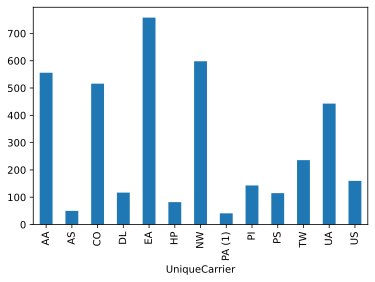

In [69]:
data_diverted.groupby('UniqueCarrier')['UniqueCarrier'].count().plot(kind='bar')

How to get more meaningful labels? They are in another table `carriers`.

In [74]:
data_diverted = pd.merge(data_diverted, carriers, left_on='UniqueCarrier', right_on="Code")
data_diverted.head()

,Year,Month,DayofMonth,UniqueCarrier,Diverted,Code,Description
0,1987,10,22,PS,1,PS,Pacific Southwest Airlines
1,1987,10,7,PS,1,PS,Pacific Southwest Airlines
2,1987,10,1,PS,1,PS,Pacific Southwest Airlines
3,1987,10,5,PS,1,PS,Pacific Southwest Airlines
4,1987,10,2,PS,1,PS,Pacific Southwest Airlines


In [76]:
# data_diverted = pd.merge(data_diverted, carriers, left_on='UniqueCarrier', right_on="Code")
data_diverted.drop('Code', axis=1, inplace=True)
data_diverted.tail()

,Year,Month,DayofMonth,UniqueCarrier,Diverted,Description
3810,1987,12,26,AS,1,Alaska Airlines Inc.
3811,1987,12,30,AS,1,Alaska Airlines Inc.
3812,1987,12,15,AS,1,Alaska Airlines Inc.
3813,1987,12,1,AS,1,Alaska Airlines Inc.
3814,1987,12,22,AS,1,Alaska Airlines Inc.


In [77]:
# Extract first two words from Description
data_diverted['Description'] = data_diverted['Description'].apply(lambda row: " ".join(row.split()[:2]))
data_diverted.tail()

,Year,Month,DayofMonth,UniqueCarrier,Diverted,Description
3810,1987,12,26,AS,1,Alaska Airlines
3811,1987,12,30,AS,1,Alaska Airlines
3812,1987,12,15,AS,1,Alaska Airlines
3813,1987,12,1,AS,1,Alaska Airlines
3814,1987,12,22,AS,1,Alaska Airlines


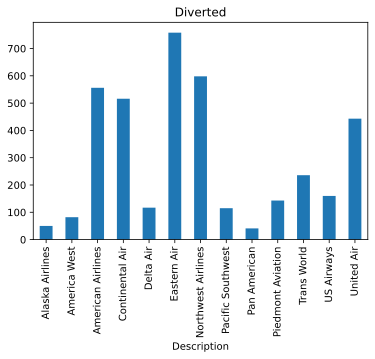

In [78]:
data_diverted.groupby('Description')['Description'].count().plot(kind='bar', title="Diverted");

## Datetime

In [113]:
df_datetime = data_1987[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']][data_1987['DepTime'].notnull()]
df_datetime.tail(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime
1311816,1987,12,5,6,1530.0,1530,1820.0,1823
1311817,1987,12,6,7,1530.0,1530,1820.0,1823
1311818,1987,12,7,1,1530.0,1530,1823.0,1823
1311819,1987,12,8,2,1530.0,1530,1820.0,1823
1311820,1987,12,10,4,1530.0,1530,1823.0,1823
1311821,1987,12,11,5,1530.0,1530,1825.0,1823
1311822,1987,12,13,7,1530.0,1530,1815.0,1823
1311823,1987,12,14,1,1530.0,1530,1807.0,1823
1311824,1987,12,1,2,1525.0,1525,1643.0,1638
1311825,1987,12,2,3,1540.0,1525,1706.0,1638


In [114]:
np.sort(df_datetime['DepTime'].unique())

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 2.358e+03, 2.359e+03,
       2.400e+03])

In [115]:
df_datetime['DepTime'] = df_datetime['DepTime'].astype(int)

In [116]:
df_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292141 entries, 0 to 1311825
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Year        1292141 non-null  int64  
 1   Month       1292141 non-null  int64  
 2   DayofMonth  1292141 non-null  int64  
 3   DayOfWeek   1292141 non-null  int64  
 4   DepTime     1292141 non-null  int64  
 5   CRSDepTime  1292141 non-null  int64  
 6   ArrTime     1288326 non-null  float64
 7   CRSArrTime  1292141 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 88.7 MB


In [117]:
df_datetime.shape

(1292141, 8)

In [118]:
df_datetime['DepTime'] = df_datetime.DepTime.astype(int)
df_datetime.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime
1311821,1987,12,11,5,1530,1530,1825.0,1823
1311822,1987,12,13,7,1530,1530,1815.0,1823
1311823,1987,12,14,1,1530,1530,1807.0,1823
1311824,1987,12,1,2,1525,1525,1643.0,1638
1311825,1987,12,2,3,1540,1525,1706.0,1638


In [119]:
from datetime import datetime
datetime.now().timestamp()

1670482144.436953

In [120]:
# 741 -> 0741
pd.to_datetime(df_datetime['DepTime'], format="%H%M")

ValueError: time data '3' does not match format '%H%M' (match)

In [121]:
s = '123'
s.zfill(4)

'0123'

In [125]:
df_datetime['DepTime'] = df_datetime['DepTime'].apply(lambda row: str(int(row)).zfill(4) if row != 2400 else '0000')
df_datetime.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,1987,10,14,3,0741,730,912.0,849
1,1987,10,15,4,0729,730,903.0,849
2,1987,10,17,6,0741,730,918.0,849
3,1987,10,18,7,0729,730,847.0,849
4,1987,10,19,1,0749,730,922.0,849


In [123]:
df_datetime.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime
1311821,1987,12,11,5,1530,1530,1825.0,1823
1311822,1987,12,13,7,1530,1530,1815.0,1823
1311823,1987,12,14,1,1530,1530,1807.0,1823
1311824,1987,12,1,2,1525,1525,1643.0,1638
1311825,1987,12,2,3,1540,1525,1706.0,1638


In [128]:
datetimes = pd.to_datetime(df_datetime['DepTime'], format="%H%M")

In [109]:
np.sort(df_datetime['DepTime'].unique())

array(['0001', '0002', '0003', ..., '2358', '2359', '2400'], dtype=object)

In [131]:
df_datetime['Dep_time'] = pd.to_datetime(df_datetime['DepTime'],  format="%H%M").dt.time

In [132]:
df_datetime.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,Dep_time
0,1987,10,14,3,0741,730,912.0,849,07:41:00
1,1987,10,15,4,0729,730,903.0,849,07:29:00
2,1987,10,17,6,0741,730,918.0,849,07:41:00
3,1987,10,18,7,0729,730,847.0,849,07:29:00
4,1987,10,19,1,0749,730,922.0,849,07:49:00


In [133]:
df_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292141 entries, 0 to 1311825
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Year        1292141 non-null  int64  
 1   Month       1292141 non-null  int64  
 2   DayofMonth  1292141 non-null  int64  
 3   DayOfWeek   1292141 non-null  int64  
 4   DepTime     1292141 non-null  object 
 5   CRSDepTime  1292141 non-null  int64  
 6   ArrTime     1288326 non-null  float64
 7   CRSArrTime  1292141 non-null  int64  
 8   Dep_time    1292141 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 98.6+ MB


In [224]:
df_datetime.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,1987,10,14,3,07:41:00,730,912.0,849
1,1987,10,15,4,07:29:00,730,903.0,849
2,1987,10,17,6,07:41:00,730,918.0,849
3,1987,10,18,7,07:29:00,730,847.0,849
4,1987,10,19,1,07:49:00,730,922.0,849


In [134]:
df_datetime['DepDate'] = df_datetime.apply(lambda row: str(row['Year']) + str(row['Month']).zfill(2) + str(row['DayofMonth']).zfill(2), axis=1)
df_datetime.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,Dep_time,DepDate
0,1987,10,14,3,0741,730,912.0,849,07:41:00,19871014
1,1987,10,15,4,0729,730,903.0,849,07:29:00,19871015
2,1987,10,17,6,0741,730,918.0,849,07:41:00,19871017
3,1987,10,18,7,0729,730,847.0,849,07:29:00,19871018
4,1987,10,19,1,0749,730,922.0,849,07:49:00,19871019


In [135]:
df_datetime['DepDate'] = pd.to_datetime(df_datetime['DepDate'], format="%Y%m%d")

In [136]:
df_datetime.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,Dep_time,DepDate
0,1987,10,14,3,0741,730,912.0,849,07:41:00,1987-10-14
1,1987,10,15,4,0729,730,903.0,849,07:29:00,1987-10-15
2,1987,10,17,6,0741,730,918.0,849,07:41:00,1987-10-17
3,1987,10,18,7,0729,730,847.0,849,07:29:00,1987-10-18
4,1987,10,19,1,0749,730,922.0,849,07:49:00,1987-10-19


In [137]:
df_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292141 entries, 0 to 1311825
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Year        1292141 non-null  int64         
 1   Month       1292141 non-null  int64         
 2   DayofMonth  1292141 non-null  int64         
 3   DayOfWeek   1292141 non-null  int64         
 4   DepTime     1292141 non-null  object        
 5   CRSDepTime  1292141 non-null  int64         
 6   ArrTime     1288326 non-null  float64       
 7   CRSArrTime  1292141 non-null  int64         
 8   Dep_time    1292141 non-null  object        
 9   DepDate     1292141 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 108.4+ MB


In [210]:
df_datetime['DepTime'].dt.time

0          07:41:00
1          07:29:00
2          07:41:00
3          07:29:00
4          07:49:00
             ...   
1311821    15:30:00
1311822    15:30:00
1311823    15:30:00
1311824    15:25:00
1311825    15:40:00
Name: DepTime, Length: 1292141, dtype: object

In [41]:
df_delay = data_1987[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay', 'ArrTime', 'CRSArrTime', 'UniqueCarrier']]
df_delay.head()

,Year,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,ArrTime,CRSArrTime,UniqueCarrier
0,1987,10,14,3,23.0,11.0,912.0,849,PS
1,1987,10,15,4,14.0,-1.0,903.0,849,PS
2,1987,10,17,6,29.0,11.0,918.0,849,PS
3,1987,10,18,7,-2.0,-1.0,847.0,849,PS
4,1987,10,19,1,33.0,19.0,922.0,849,PS


In [14]:
df_delay.groupby('DayOfWeek')['ArrDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,185616.0,9.423212,25.072003,-1236.0,-3.0,4.0,14.0,869.0
2,185619.0,11.504345,26.542482,-1279.0,-2.0,6.0,17.0,932.0
3,187124.0,11.233519,30.786781,-1302.0,-2.0,5.0,15.0,940.0
4,198323.0,9.764203,24.108671,-1302.0,-2.0,5.0,15.0,851.0
5,182445.0,8.791373,23.757845,-1290.0,-3.0,4.0,14.0,860.0
6,171524.0,5.928267,22.209079,-1280.0,-5.0,2.0,10.0,800.0
7,177675.0,9.154890,26.838629,-1295.0,-3.0,3.0,13.0,1033.0


In [19]:
delays_by_month = []
for i in range(10, 13):
    delays_by_month.append(df_delay[df_delay.Month == i]['ArrDelay'].dropna())

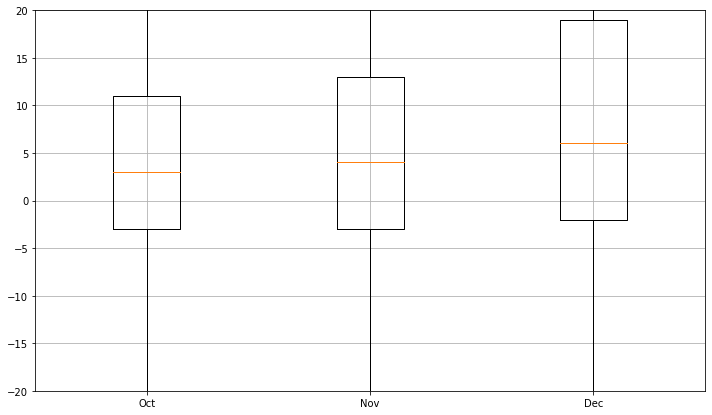

In [20]:
plt.figure(figsize=(12, 7))
plt.boxplot(delays_by_month, labels=["Oct", "Nov", "Dec"]);
plt.ylim(-20, 20)
plt.grid();

In [42]:
delays_by_carrier = []
for carrier in df_delay.UniqueCarrier.unique():
    delays_by_carrier.append(df_delay[df_delay.UniqueCarrier == carrier]['ArrDelay'].dropna())

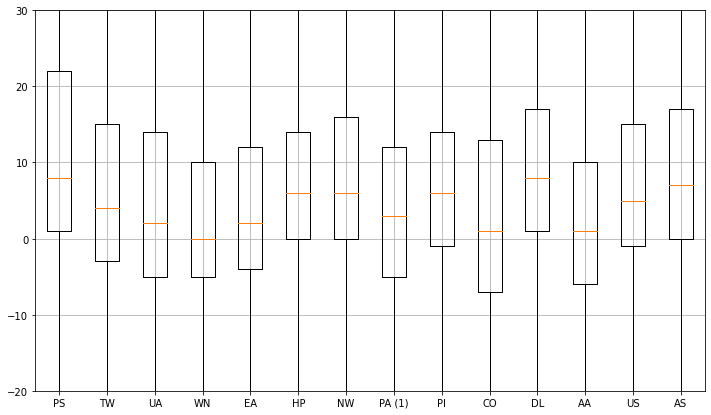

In [46]:
plt.figure(figsize=(12, 7))
plt.boxplot(delays_by_carrier, labels=df_delay.UniqueCarrier.unique());
plt.ylim(-20, 30)
plt.grid();